In [59]:
# for data evaluation
!pip install rouge

## Data Preprocessing

In [31]:
import pandas as pd
import numpy

DEBUG = False

def print_debug(text):
    if DEBUG:
        print(text)

In [3]:
import json
import io

FILE = "sample_data_only_beauty_category.json"

with open(FILE, "r") as f:
    file_contents = f.read()

# Clean up malformed items like "Shipping Weight:": "14.4 ounces ("
file_contents = file_contents.replace(" (\" ","")

# wrap the raw string in a StringIO object for pandas.read_json()
raw_data = io.StringIO(file_contents)

In [4]:
#a = json.loads(text, strict=False)

df_raw = pd.read_json(raw_data)
df_raw.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,NaT,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,NaT,,B0000531EN,[],[]
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,NaT,,B0000532JH,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,NaT,$15.99,B00005A77F,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,NaT,$18.00,B00005NDTD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


## Data Transformation

In [5]:
# The Flan-T5 model that I finetuned expects a CustomDataset, so we change the datset into the expected format

df = pd.DataFrame(data=df_raw[["title","description"]])
df['description'].replace('', np.nan, inplace=True)
df.head()

,title,description
0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[After a long day of handling thorny situation...
1,AHAVA Bath Salts,[If you haven't experienced the pleasures of b...
2,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4","[Rich, black mineral mud, harvested from the b..."
3,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[This liquid soap with convenient pump dispens...
4,Soy Milk Hand Crme,[Remember why you love your favorite blanket? ...


In [6]:
# combine description text (an array of strings) into one string

a = df["description"][0]
print(f"Before:\n")
for i in a:
    print(f"{i}")

#df["description"] = df["description"].apply(literal_eval)
#df["description"] = np.concatenate(df["description"])
df["description"] = df["description"].apply(''.join)
#a = np.concatenate(df["description"])
b = df["description"][0]
print(f"\nAfter:\n{b}")

df.head()

Before:

After a long day of handling thorny situations, our new hand therapy pump is just the help you need. It contains shea butter as well as extracts of yarrow, clover and calendula to help soothe and condition work-roughened hands.
By Crabtree & Evelyn
The aromatic benefits of herbs are varied and far-reaching, so we combined a whole bunch of them into one restoratively fragrant line-up straight from the garden.
We&#039;ve formulated our Gardeners Hand Therapy with Myrrh Extract to help condition nails and cuticles as well as skin super hydrators macadamia seed oil and shea butter to help replenish lost moisture. Rich in herbal extracts like cooling cucumber and rosemary leaf  a favourite for antioxidants  to help protect hands against daily urban and environmental stresses while the hydrating power of Vitamin E, Hyaluronic Acid and Ceramides contribute to improve the skins natural moisture barrier with this garden-inspired treatment. Skin is left silky-soft and delicately scented

,title,description
0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,After a long day of handling thorny situations...
1,AHAVA Bath Salts,If you haven't experienced the pleasures of ba...
2,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4","Rich, black mineral mud, harvested from the ba..."
3,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",This liquid soap with convenient pump dispense...
4,Soy Milk Hand Crme,Remember why you love your favorite blanket? T...


In [7]:
# remove trailing images like img alt=""
a = df["description"][9]
print(f"Before:\n{a}")

df.replace({"description":"<.*>"}, {"description":""}, regex=True, inplace=True)
df.replace({"description":"[\n\t ]*$"}, {"description":""}, regex=True, inplace=True) # Trim trailing blank text

b = df["description"][9]
print(f"\nAfter:\n{b}")

Before:
Naturally stimulating essential oils make our Morning Mint Body Lotion an aromatherapy essential in your daily beauty ritual. Sought after by women and men alike, this best-selling, natural mint lotion makes the perfect gift.Welcome to the world of Archipelago Botanicals - where warm candlelight, exquisite fragrance, and soothing products make a house a home.Jump start each morning with a gentle boost from Mother Nature! Naturally invigorating essential oils, such as fresh basil and mandarin, awaken the senses and fill the shower with amazing notes of citrus and mint. There is no better way to start the day.<a class="a-link-normal" target="_blank" rel="noopener" href="https://m.media-amazon.com/images/S/aplus-media/vc/e679f131-d7de-4b18-83b9-1af750842586.jpg">
            <img alt="" src="https://m.media-amazon.com/images/S/aplus-media/vc/e679f131-d7de-4b18-83b9-1af750842586._SL220__.jpg" />
        </a><a class="a-link-normal" target="_blank" rel="noopener" href="https://m.med

In [8]:
# Rename columns to the format expected by our CustomDataset
df_flanT5 = df.rename({'description': 'sent'}, axis='columns')
df_flanT5.head()

,title,sent
0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,After a long day of handling thorny situations...
1,AHAVA Bath Salts,If you haven't experienced the pleasures of ba...
2,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4","Rich, black mineral mud, harvested from the ba..."
3,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",This liquid soap with convenient pump dispense...
4,Soy Milk Hand Crme,Remember why you love your favorite blanket? T...


## Flan-T5 finetuned model

In [9]:
import torch
from FlanT5 import T5FineTuner, tokenize_dataset

In [10]:
CKPT_PATH = None
CKPT_PATH = "epoch=3-step=2072-train_loss=0.35.ckpt"
#CKPT_PATH = "lightning_logs/version_34/epoch=3-step=2072-train_loss=0.35.ckpt"
#CKPT_PATH = "lightning_logs/version_30/final.ckpt"

checkpoint = torch.load(CKPT_PATH)
print(checkpoint.keys())

llm = T5FineTuner.load_from_checkpoint(CKPT_PATH)

llm.model.eval() # set model to evaluation mode
llm = llm.to("cpu") # use CPU since I don't have GPU
print("Done")

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters'])


C:\Users\lawfu\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Done


In [25]:
# prompt Flan-T5
from torch.utils.data import DataLoader
from CustomDataset import CustomDataset
from transformers import (
    AutoTokenizer
)
import textwrap

BATCH_SIZE = 5
BATCH_LIMIT = 0 # set to 0 to look at everything

# T5 Tokenizer
tokenizer = AutoTokenizer.from_pretrained('google/flan-t5-small')
dataset = CustomDataset(tokenizer=tokenizer, dataset=df_flanT5, type_path='test')
print("Loaded CustomDataset")

outputs = []
texts = []

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, num_workers=2, shuffle=False)
batch_num = 0
for batch in dataloader:
    if (BATCH_LIMIT != 0) and (batch_num >= BATCH_LIMIT):
        break

    print_debug(f"\nBatch {batch_num}/{BATCH_LIMIT} (batch size: {BATCH_SIZE})\n")
    # run model with input
    outs = llm.model.generate(input_ids=batch['source_ids'],
                                attention_mask=batch['source_mask'])

    # decode and print output
    dec = [tokenizer.decode(ids, skip_special_tokens=True, clean_up_tokenization_spaces=False).strip() for ids in outs]
    text = [tokenizer.decode(ids, skip_special_tokens=True, clean_up_tokenization_spaces=False).strip() for ids in batch["source_ids"]]
    texts.extend(text)
    outputs.extend(dec)

    printout = f"Total seen: {len(texts)}"
    if not DEBUG:
        print("\r" + printout, end="") # overwrite same line
    print_debug(printout)
    
    # pretty print results for debugging
    if DEBUG:
        i = 0
        for i in range(BATCH_SIZE):
            next_index = len(texts)-BATCH_SIZE+i
            input_lines = textwrap.wrap(f"text:\n{texts[next_index]}\n", width=100)
            output_lines = outputs[next_index]

            print(f"i: {i}, next_index: {next_index}, input length: {len(texts[next_index])}\n")
            print("\n".join(input_lines))
            print(f"Predicted Entities: {output_lines}\n")

    batch_num = batch_num + 1

Loaded CustomDataset
Total seen: 12299

In [26]:
testrun_df = pd.DataFrame({"input": texts, "output": outputs})
testrun_df.head()

,input,output
0,after a long day of handling thorny situations...,creator: john evelyn
1,if you haven't experienced the pleasures of ba...,bath crystals
2,"rich, black mineral mud, harvested from the ba...",mineral mud
3,this liquid soap with convenient pump dispense...,cultivated by: gardeners
4,remember why you love your favorite blanket? t...,oat protein blend: oat protein


In [ ]:
file_name = "sample_data_model_output.csv"
testrun_df.to_csv(file_name)
print(f"Wrote to file at {file_name}")

# Model Evaluation

## Evaluation 1/2

### Load Results From File

In [74]:
file_name = "sample_data_model_output.csv"
results_df = pd.read_csv(file_name)
results_df.head()

,Unnamed: 0,input,output
0,0,after a long day of handling thorny situations...,creator: john evelyn
1,1,if you haven't experienced the pleasures of ba...,bath crystals
2,2,"rich, black mineral mud, harvested from the ba...",mineral mud
3,3,this liquid soap with convenient pump dispense...,cultivated by: gardeners
4,4,remember why you love your favorite blanket? t...,oat protein blend: oat protein


In [75]:
generated = results_df["output"]
source = results_df["input"]

print(f"{generated[0]} \n {source[0]}")

creator: john evelyn 
 after a long day of handling thorny situations, our new hand therapy pump is just the help you need. it contains shea butter as well as extracts of yarrow, clover and calendula to help soothe and condition work-roughened hands.by crabtree & evelynthe aromatic benefits of herbs are varied and far-reaching, so we combined a whole bunch of them into one restoratively fragrant line-up straight from the garden.we&#039;ve formulated our gardeners hand therapy with myrrh extract to help condition nails and cuticles as well as skin super hydrators macadamia seed oil and shea butter to help replenish lost moisture. rich in herbal extracts like cooling cucumber and rosemary leaf a favourite for antioxidants to help protect hands against daily urban and environmental stresses while the hydrating power of vitamin e, hyaluronic acid and ceramides contribute to improve the skins natural moisture barrier with this garden-inspired treatment. skin is left silky-soft and delicatel

### ROUGE
Recall-Oriented Understudy for Gisting Evaluation

In [5]:
from rouge import Rouge 
rouge = Rouge()

In [6]:
scores = rouge.get_scores(generated[0], source[0])
print(scores)

[{'rouge-1': {'r': 0.005434782608695652, 'p': 0.3333333333333333, 'f': 0.01069518685006721}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.005434782608695652, 'p': 0.3333333333333333, 'f': 0.01069518685006721}}]


### BLEU
Bilingual Evaluation Understudy

In [7]:
# needed for word_tokennize
import nltk
nltk.download('punkt_tab')
# for bleu
from nltk.translate.bleu_score import sentence_bleu
from nltk import word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lawfu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [33]:
scores = []
for i in range(0,len(generated)-1):
    g = generated[i]
    s = source[i]
    print_debug(f"i: {i}\ng {type(g)}\ns: {s}\n")
    if g and s:
        sc = sentence_bleu(word_tokenize(str(generated[i])), word_tokenize(str(source[i])))
        print_debug(f"score: {sc}")
        scores.extend([sc])
print(len(scores))

12298


In [35]:
print(f"BLEU: {scores[0]}")

BLEU: 5.780504045619045e-232


Calculate the average BLEU score

In [49]:
import numpy as np

np_scores = np.array(scores)
avg = np_scores.mean()
maximum = np_scores.max()
print(f"{avg}/{maximum}")

percents = np_scores / maximum

5.244084662212273e-159/2.9416364921081275e-155


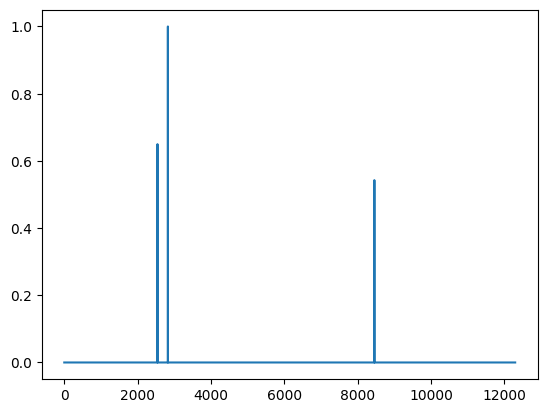

In [51]:
import matplotlib.pyplot as plt

plt.plot(percents)

## Evaluation 2/2

### Manual Labelling for Classification

In [76]:
results_df['pre'] = results_df['output'].apply(lambda x: str(x).split(':')[0])
results_df['post'] = results_df['output'].apply(lambda x: str(x).split(':')[-1])
results_df.head()

,Unnamed: 0,input,output,pre,post
0,0,after a long day of handling thorny situations...,creator: john evelyn,creator,john evelyn
1,1,if you haven't experienced the pleasures of ba...,bath crystals,bath crystals,bath crystals
2,2,"rich, black mineral mud, harvested from the ba...",mineral mud,mineral mud,mineral mud
3,3,this liquid soap with convenient pump dispense...,cultivated by: gardeners,cultivated by,gardeners
4,4,remember why you love your favorite blanket? t...,oat protein blend: oat protein,oat protein blend,oat protein


Mark some obviously incorrect answers so I can manually label them.

Automatically mark any output that isn't formatted correctly (e.g. one that is missing a colon, meaning it failed to present either a class or an instance) as False.

An answer is evaluated to be incorrect if

* the output is in the incorrect format
* the output is missing a class for the instance
* the output is missing an instance for the identified class
* the identified class (e.g., creator) is incorrect for the identified instance from the text (e.g. john evelyn).
* the identified instance is not present in the text

This handles:
* incorrect format
* missing class
* missing instance

In [77]:
results_df['result'] = results_df['output'].apply(lambda x: False if ':' not in str(x) else '')
results_df.head()

,Unnamed: 0,input,output,pre,post,result
0,0,after a long day of handling thorny situations...,creator: john evelyn,creator,john evelyn,
1,1,if you haven't experienced the pleasures of ba...,bath crystals,bath crystals,bath crystals,False
2,2,"rich, black mineral mud, harvested from the ba...",mineral mud,mineral mud,mineral mud,False
3,3,this liquid soap with convenient pump dispense...,cultivated by: gardeners,cultivated by,gardeners,
4,4,remember why you love your favorite blanket? t...,oat protein blend: oat protein,oat protein blend,oat protein,


In [78]:
#results_df['input'].replace('', np.nan, inplace=True)
results_df['input'] = results_df['input'].replace('', np.nan)
results_df2 = results_df.dropna()
print(f"{len(results_df)} -> {len(results_df2)}")
results_df2.head()

12299 -> 12093


,Unnamed: 0,input,output,pre,post,result
0,0,after a long day of handling thorny situations...,creator: john evelyn,creator,john evelyn,
1,1,if you haven't experienced the pleasures of ba...,bath crystals,bath crystals,bath crystals,False
2,2,"rich, black mineral mud, harvested from the ba...",mineral mud,mineral mud,mineral mud,False
3,3,this liquid soap with convenient pump dispense...,cultivated by: gardeners,cultivated by,gardeners,
4,4,remember why you love your favorite blanket? t...,oat protein blend: oat protein,oat protein blend,oat protein,


Write the results to file to perform the rest of the analysis manually.

In [79]:
file_name = "sample_data_model_output_labelled.csv"
results_df.to_csv(file_name)
print(f"Wrote to file at {file_name}")

Wrote to file at sample_data_model_output_labelled.csv


### Precision, Recall, F1

Precision: how many of the ones labelled as X are correct

Recall: how many of the ones that are X were labelled correctly

In [84]:
import sklearn.metrics

file_name = "sample_data_model_output_labelled_manually.csv"
results_df3 = pd.read_csv(file_name)
results_df3.head()

,Unnamed: 0.1,Unnamed: 0,input,output,pre,pre_correct,post,result,y_ground
0,0,0,after a long day of handling thorny situations...,creator: john evelyn,creator,creator,john evelyn,NaN,creator
1,1,1,if you haven't experienced the pleasures of ba...,bath crystals,bath crystals,product,bath crystals,False,False
2,2,2,"rich, black mineral mud, harvested from the ba...",mineral mud,mineral mud,product,mineral mud,False,False
3,3,3,this liquid soap with convenient pump dispense...,cultivated by: gardeners,cultivated by,cultivated by,gardeners,NaN,cultivated by
4,4,4,remember why you love your favorite blanket? t...,oat protein blend: oat protein,oat protein blend,product,oat protein,False,False


compare pre to y_ground.

pre_correct is the manually-entered.

In [104]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder as le

y_true = results_df3['pre'][0:60].astype(str)
y_pred = results_df3['y_ground'][0:60].astype(str)

In [105]:
precision = metrics.precision_score(y_true, y_pred, average='weighted')

C:\Users\lawfu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [106]:
recall = metrics.recall_score(y_true, y_pred, average='weighted')

C:\Users\lawfu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
f1 = metrics.f1_score(y_true, y_pred, average='weighted') #*, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

In [108]:
print(f"{precision}, {recall}, {f1}")

0.4666666666666667, 0.3333333333333333, 0.3624074074074074
